In [1]:
#importing important python libraries
import numpy as np # this library is used for dealing with arrays and numerical values
import pandas as pd # this library is used for dealing with dataframes
import matplotlib.pyplot as plt # this library is used for visulization
import seaborn as sns # this library is used for visulization
import missingno as msno # this library is used for visualising mssing values
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

## Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

In [2]:
churn = pd.read_csv("Telco_customer_churn.csv")
pd.pandas.set_option('display.max_columns',None)  

In [3]:
churn.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
churn['Total Charges'] = churn['Total Charges'].replace({" ": None})

In [6]:
churn['Total Charges'] = pd.to_numeric(churn['Total Charges'])

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## Q2: Please apply appropriate statistical measures using python based on data types.

In [8]:
churn.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [30]:
churn.describe(include='object')

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,192


## Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

ValueError: could not convert string to float: 'Male'

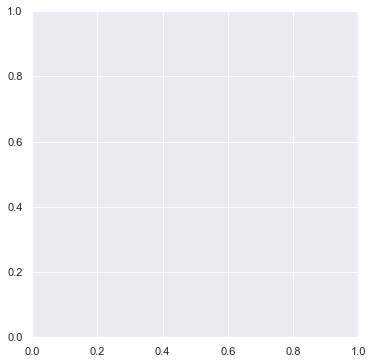

In [34]:
plt.pie(churn.Gender)
plt.show()

<AxesSubplot:ylabel='None'>

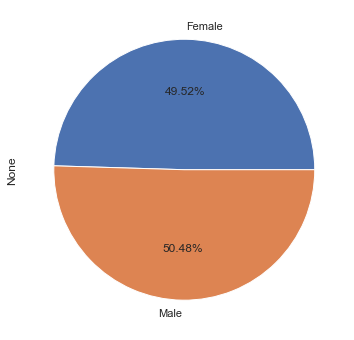

In [37]:
churn.groupby('Gender').size().plot(kind='pie', autopct='%.2f%%')

<AxesSubplot:ylabel='None'>

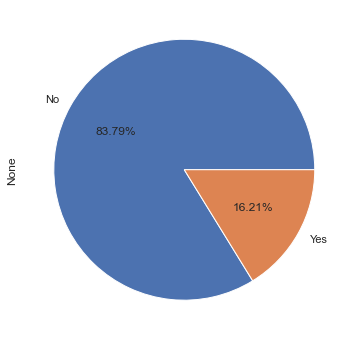

In [38]:
churn.groupby('Senior Citizen').size().plot(kind='pie', autopct='%.2f%%')

In [40]:
only_female = churn[churn['Gender'] == 'Female']

<AxesSubplot:ylabel='None'>

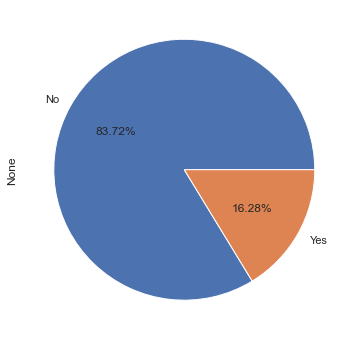

In [41]:
only_female.groupby('Senior Citizen').size().plot(kind='pie', autopct='%.2f%%')

## Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

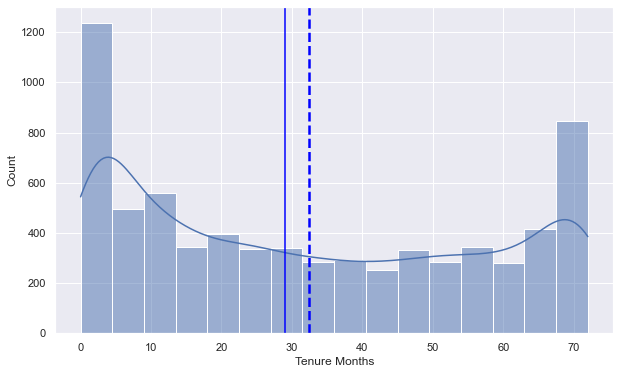

In [9]:
sns.histplot(x=churn['Tenure Months'], kde=True)
plt.axvline(x=churn['Tenure Months'].mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=churn['Tenure Months'].median(), color='blue',label='medain')

In [10]:
churn['Tenure Months'].skew()

0.2395397495619829

In [44]:
churn['Tenure Months'].median()

29.0

In [11]:
q1 = churn['Tenure Months'].quantile(0.25)
q2 = churn['Tenure Months'].quantile(0.75)
q3 = q1-q2
q3


-46.0

## Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [12]:
churn1 = churn.copy()
churn1.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [13]:
binary_columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Churn Label', 
                  'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection',
                 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing']

In [46]:
for i in binary_columns:
    churn1[i] = churn1[i].replace({'Yes':1 ,'No':0,'No phone service':-1, 'No internet service':-1})
    
churn1[binary_columns] = churn1[binary_columns].astype('category')

In [15]:
churn1.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,0,1,0,10,1,0,DSL,0,0,1,1,0,0,Month-to-month,0,Credit card (automatic),55.20,528.35,1,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,1,0,0,1,0,-1,DSL,0,0,1,0,0,1,Month-to-month,1,Electronic check,39.65,39.65,1,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,0,0,0,1,1,0,No,-1,-1,-1,-1,-1,-1,Month-to-month,0,Mailed check,20.15,20.15,1,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,0,1,1,47,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Electronic check,99.35,4749.15,1,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,0,Electronic check,30.20,30.20,1,1,97,2915,Competitor had better devices


## Q6.  Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

<AxesSubplot:xlabel='Gender', ylabel='Monthly Charges'>

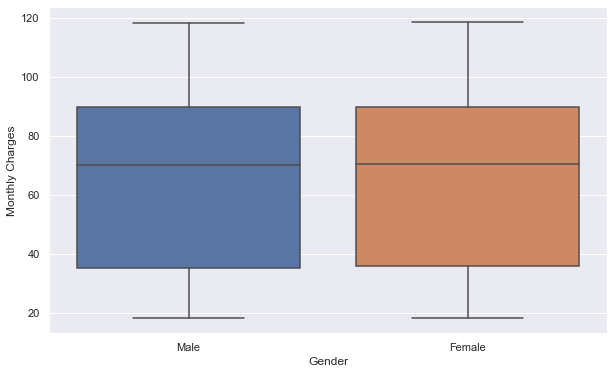

In [16]:
sns.boxplot(y=churn['Monthly Charges'], x=churn['Gender'])

## Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [17]:
churn[churn['Total Charges'] == churn['Total Charges'].min()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3087,2967-MXRAV,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,Yes,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.8,18.8,No,0,51,5160,NaN


In [18]:
churn[churn['Total Charges'] == churn['Total Charges'].max()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1206,2889-FPWRM,1,United States,California,Mckinleyville,95519,"40.965011, -124.015255",40.965011,-124.015255,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes,1,100,4432,Competitor offered higher download speeds


In [19]:
churn2 =churn.copy()

In [20]:
churn2['Zip Code'] = churn2['Zip Code'].astype(object)

In [21]:
max_total_charges = churn2.sort_values("Total Charges", ascending=False).head(10)
max_total_charges

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1206,2889-FPWRM,1,United States,California,Mckinleyville,95519,"40.965011, -124.015255",40.965011,-124.015255,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,1,100,4432,Competitor offered higher download speeds
5251,7569-NMZYQ,1,United States,California,Middletown,95461,"38.787446, -122.58675",38.787446,-122.586750,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,0,49,5475,NaN
6850,9739-JLPQJ,1,United States,California,Long Beach,90822,"33.778436, -118.118648",33.778436,-118.118648,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No,0,47,6009,NaN
5814,9788-HNGUT,1,United States,California,Cabazon,92230,"33.929812, -116.76058",33.929812,-116.760580,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No,0,78,5949,NaN
3478,8879-XUAHX,1,United States,California,Irvine,92614,"33.680302, -117.833296",33.680302,-117.833296,Male,No,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No,0,47,6124,NaN
6372,9924-JPRMC,1,United States,California,Lockeford,95237,"38.166791, -121.14207",38.166791,-121.142070,Male,No,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No,0,55,4886,NaN
5964,0675-NCDYU,1,United States,California,Placentia,92870,"33.881158, -117.854783",33.881158,-117.854783,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.40,8543.25,No,0,74,6491,NaN
3617,6650-BWFRT,1,United States,California,Cambria,93428,"35.591387, -121.032256",35.591387,-121.032256,Female,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No,0,41,4743,NaN
3799,0164-APGRB,1,United States,California,Calistoga,94515,"38.629618, -122.593216",38.629618,-122.593216,Female,No,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,No,0,69,4589,NaN
3356,1488-PBLJN,1,United States,California,San Diego,92124,"32.827238, -117.089287",32.827238,-117.089287,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.70,No,0,33,4055,NaN


<AxesSubplot:xlabel='Zip Code', ylabel='Zip Code'>

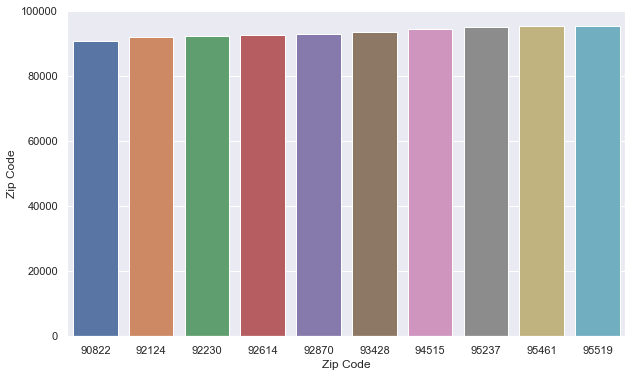

In [22]:
sns.barplot(x='Zip Code' ,y='Zip Code', data=max_total_charges)

## Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

In [23]:
churn[churn['Churn Score'] == churn['Churn Score'].min()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2148,7156-MXBJE,1,United States,California,San Diego,92127,"33.017518, -117.118456",33.017518,-117.118456,Female,No,No,No,43,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),85.1,3662.25,No,0,5,2319,NaN


In [24]:
churn[churn['Churn Score'] == churn['Churn Score'].max()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
39,3445-HXXGF,1,United States,California,Sierra Madre,91024,"34.168686, -118.057505",34.168686,-118.057505,Male,Yes,Yes,No,58,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,45.30,2651.20,Yes,1,100,5444,Service dissatisfaction
100,0533-BNWKF,1,United States,California,Palm Desert,92211,"33.762759, -116.324817",33.762759,-116.324817,Female,Yes,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,85.45,4874.70,Yes,1,100,5502,Lack of affordable download/upload speed
151,1009-IRMNA,1,United States,California,Port Hueneme,93041,"34.110124, -119.100972",34.110124,-119.100972,Female,No,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,137.60,Yes,1,100,4479,Competitor offered more data
189,3900-AQPHZ,1,United States,California,Pearblossom,93553,"34.445239, -117.894868",34.445239,-117.894868,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.90,Yes,1,100,4248,Competitor offered higher download speeds
226,3804-RVTGV,1,United States,California,Mountain View,94043,"37.419725, -122.062947",37.419725,-122.062947,Male,No,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.85,5017.90,Yes,1,100,5812,Price too high
279,5536-RTPWK,1,United States,California,Sausalito,94965,"37.848641, -122.515692",37.848641,-122.515692,Male,No,Yes,No,49,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.05,4853.75,Yes,1,100,5157,Competitor offered higher download speeds
288,4607-CHPCA,1,United States,California,San Martin,95046,"37.084697, -121.606417",37.084697,-121.606417,Male,No,Yes,No,25,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Electronic check,90.40,2178.60,Yes,1,100,5801,Competitor made better offer
439,5364-XYIRR,1,United States,California,Los Angeles,90013,"34.044639, -118.240413",34.044639,-118.240413,Male,No,Yes,No,51,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,4812.75,Yes,1,100,4747,Extra data charges
458,3198-VELRD,1,United States,California,Marina Del Rey,90292,"33.977468, -118.445475",33.977468,-118.445475,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),84.75,264.85,Yes,1,100,2014,Attitude of support person


<AxesSubplot:xlabel='Payment Method', ylabel='Churn Score'>

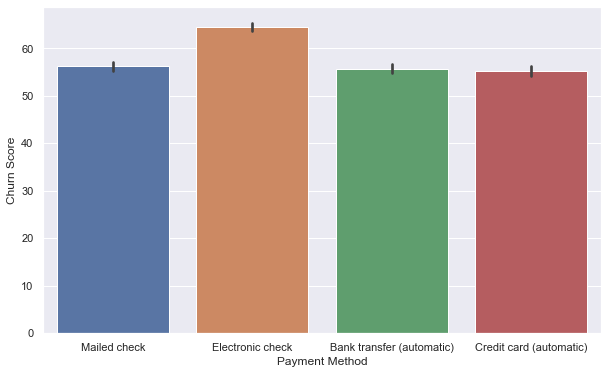

In [25]:
sns.barplot(y=churn['Churn Score'], x=churn['Payment Method'])

## Q9 Please create an appropriate plot to check the count of payment methods and explain it.

<AxesSubplot:xlabel='Payment Method', ylabel='count'>

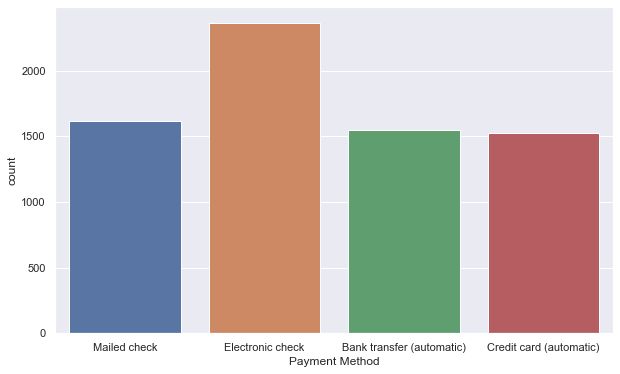

In [26]:
sns.countplot(x=churn['Payment Method'])

## Q10 Please create an appropriate plot to see the relationship between monthly charges and total charges.

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total Charges'>

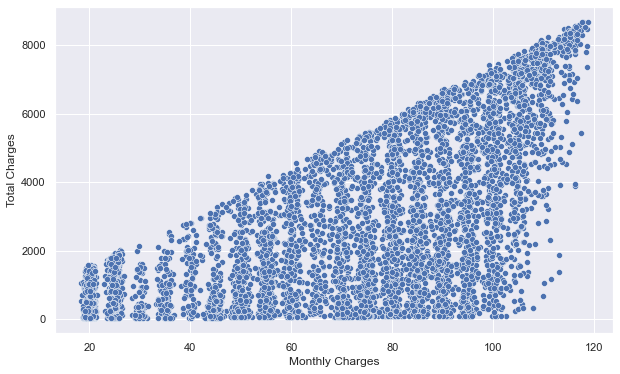

In [27]:
sns.scatterplot(x=churn['Monthly Charges'], y=churn['Total Charges'])